In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import torch
import torch.nn as nn

# Carregando base

In [51]:
import pandas as pd
X = pd.read_csv("../../bases/bases/entradas_breast.csv")
y = pd.read_csv("../../bases/bases/saidas_breast.csv")

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

In [53]:
x_train.shape, x_test.shape

((426, 30), (143, 30))

# Transformação para tensores

In [54]:
type(x_train)

pandas.core.frame.DataFrame

In [55]:
import numpy as np

np.array(x_train)

array([[1.200e+01, 2.823e+01, 7.677e+01, ..., 7.116e-02, 2.447e-01,
        8.194e-02],
       [1.157e+01, 1.904e+01, 7.420e+01, ..., 6.664e-02, 3.035e-01,
        8.284e-02],
       [1.646e+01, 2.011e+01, 1.093e+02, ..., 2.035e-01, 3.054e-01,
        9.519e-02],
       ...,
       [1.747e+01, 2.468e+01, 1.161e+02, ..., 1.721e-01, 2.160e+02,
        9.300e+01],
       [1.008e+01, 1.511e+01, 6.376e+01, ..., 1.042e-02, 2.933e-01,
        7.697e-02],
       [1.674e+01, 2.159e+01, 1.101e+02, ..., 1.813e-01, 4.863e-01,
        8.633e-02]], shape=(426, 30))

In [56]:
x_train = torch.tensor(np.array(x_train), dtype=torch.float)

In [57]:
y_train = torch.tensor(np.array(y_train), dtype=torch.float)

In [58]:
dataset = torch.utils.data.TensorDataset(x_train, y_train)

In [59]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [60]:
train_loader

# Construção do modelo

In [61]:
30 -> 16 -> 16 -> 1

(entradas + saidas) / 2 -> (30 + 1) / 2 ~ 16

SyntaxError: invalid syntax (187511383.py, line 1)

In [62]:
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=1),
    nn.Sigmoid()
)

In [63]:
classificador

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [64]:
# Criando a função de custo

criterion = nn.BCELoss()

In [65]:
# Criando o otimizador

optimizer = torch.optim.Adam(
    params=classificador.parameters(),
    lr=0.001,
    weight_decay=0.0001
) 

# Treinando o modelo

In [74]:
num_epochs = 100

for epoch in range(num_epochs):
    running_loss = 0.
    for data in train_loader:
        inputs, labels = data
        
		# zerando o gradiente a cada iteração
        optimizer.zero_grad()
        
		# realizando uma previsão
        outputs = classificador.forward(input=inputs)
        
		# Medindo a loss a cada iteração
        loss = criterion(outputs, labels)
        
		# Realizando o backpropagation (depois de ter realizado o forward)
        loss.backward()
        
		# Atualizar os novos pesos depois do algoritmo de backpropagation
        optimizer.step()
        
		# Acumulando a loss para uma única época
        running_loss += loss.item() # pegando apenas o valor da loss de um objeto
    print(f"Época {epoch+1} -> {running_loss/len(train_loader):.4f}")

Época 1 -> 0.1336
Época 2 -> 0.2327
Época 3 -> 0.1377
Época 4 -> 0.1356
Época 5 -> 0.1034
Época 6 -> 0.1165
Época 7 -> 0.1200
Época 8 -> 0.1424
Época 9 -> 0.1133
Época 10 -> 0.1162
Época 11 -> 0.1321
Época 12 -> 0.1199
Época 13 -> 0.1016
Época 14 -> 0.0966
Época 15 -> 0.0999
Época 16 -> 0.1142
Época 17 -> 0.0992
Época 18 -> 0.1116
Época 19 -> 0.2699
Época 20 -> 0.1775
Época 21 -> 0.1150
Época 22 -> 0.1304
Época 23 -> 0.1270
Época 24 -> 0.1394
Época 25 -> 0.1222
Época 26 -> 0.1147
Época 27 -> 0.1550
Época 28 -> 0.1663
Época 29 -> 0.1037
Época 30 -> 0.1486
Época 31 -> 0.1399
Época 32 -> 0.1698
Época 33 -> 0.1144
Época 34 -> 0.1365
Época 35 -> 0.1470
Época 36 -> 0.1295
Época 37 -> 0.1189
Época 38 -> 0.1277
Época 39 -> 0.1181
Época 40 -> 0.1332
Época 41 -> 0.1235
Época 42 -> 0.1039
Época 43 -> 0.1275
Época 44 -> 0.1031
Época 45 -> 0.1109
Época 46 -> 0.0977
Época 47 -> 0.1064
Época 48 -> 0.1003
Época 49 -> 0.1181
Época 50 -> 0.1017
Época 51 -> 0.1133
Época 52 -> 0.1072
Época 53 -> 0.0914
Ép

# Visualização dos pesos

In [75]:
params = list(classificador.parameters())

In [76]:
params

[Parameter containing:
 tensor([[ 4.5387e-02,  8.4396e-03, -4.0955e-01,  2.4517e-02,  4.2247e-01,
           1.9047e-01,  6.3990e-02,  5.2063e-01,  2.1347e-01, -7.8446e-02,
           5.2840e-03, -8.7747e-02, -2.5718e-02,  1.8028e-01,  9.8323e-03,
           4.9104e-02,  2.8553e-01,  1.0107e-02, -7.7961e-01,  6.5133e-03,
           1.1759e-01,  1.5678e-02, -1.2424e-01,  1.6055e-01,  3.5179e-02,
          -1.8614e-01,  4.3601e-01,  6.2011e-01,  1.1336e-02,  7.9907e-02],
         [ 1.3565e-01, -4.4639e-02,  3.0654e-01,  8.1382e-02, -1.5343e-01,
          -4.2714e-02,  1.1998e-02,  3.3472e-02,  6.0645e-02,  9.8468e-02,
           1.9989e-01, -3.4931e-02,  2.4987e-02,  3.5771e-02, -1.0889e-02,
          -5.7464e-02,  2.7872e-01, -1.9354e-02,  3.0092e-01, -5.3909e-02,
           2.4062e-02, -5.5030e-01,  9.5391e-02, -1.6012e-01, -2.2315e-01,
           2.4948e-02,  4.1746e-02, -2.8647e-01, -6.2574e-02, -1.2964e-01],
         [ 1.8055e-01,  1.1937e-01,  3.6746e-04, -1.8546e-01,  4.4759e-04,


# Avaliando o modelo

In [ ]:
# Colocando o modelo em modo de evaluação, ou seja, ele para de realizar o ajuste dos pesos.
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [78]:
# Transformando base de teste em torch
x_test = torch.tensor(np.array(x_test), dtype=torch.float)

In [79]:
x_test

tensor([[1.0800e+01, 2.1980e+01, 6.8790e+01,  ..., 7.4850e-02, 2.9650e-01,
         7.6620e-02],
        [1.0160e+01, 1.9590e+01, 6.4730e+01,  ..., 2.2320e-02, 2.2620e-01,
         6.7420e-02],
        [8.8780e+03, 1.5490e+01, 5.6740e+01,  ..., 4.7620e-02, 2.4340e-01,
         7.4310e-02],
        ...,
        [1.0320e+01, 1.6350e+01, 6.5310e+01,  ..., 2.3810e-02, 2.6810e-01,
         7.3990e-02],
        [1.3280e+01, 1.3720e+01, 8.5790e+01,  ..., 9.1730e-02, 2.7360e-01,
         7.3200e-02],
        [1.3850e+01, 1.7210e+01, 8.8440e+01,  ..., 5.1040e-02, 2.3640e-01,
         7.1820e-02]])

In [80]:
previsoes = classificador.forward(x_test)

In [83]:
# irá retornar valores entre 0 e 1, dada a função de ativação sigmóide
previsoes[:2]

tensor([[0.9999],
        [0.9884]], grad_fn=<SliceBackward0>)

In [84]:
threshold = 0.5

previsoes = np.array(previsoes > threshold)

/tmp/ipykernel_39966/559825693.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  previsoes = np.array(previsoes > threshold)


In [87]:
y_test = np.array(y_test)

In [89]:
taxa_acerto = accuracy_score(y_test, previsoes)

In [90]:
taxa_acerto

0.8951048951048951

In [92]:
matrix = confusion_matrix(y_test, previsoes)
matrix

array([[42,  2],
       [13, 86]])

<Axes: >

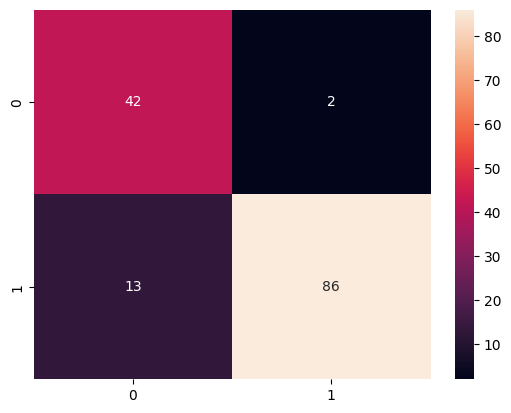

In [93]:
sns.heatmap(matrix, annot=True)